# INSTALL ALL DEPENDENCIES

In [ ]:
!pip install datasets 
!pip install transformers
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install nltk
!pip install xgboost
!pip install networkx
!pip install plotly
!pip install textblob

from huggingface_hub.lfs import List
import pandas as pd

In [ ]:
CLASS_NAMES = {

    "0":"admiration",
    "1":"amusement",
    "2":"anger",
    "3":"annoyance",
    "4":"approval",
    "5":"caring",
    "6":"confusion",
    "7":"curiosity",
    "8":"desire",
    "9":"disappointment",
    "10":"disapproval",
    "11":"disgust",
    "12":"embarrassment",
    "13":"excitement",
    "14":"fear",
    "15":"gratitude",
    "16":"grief",
    "17":"joy",
    "18":"love",
    "19":"nervousness",
    "20":"optimism",
    "21":"pride",
    "22":"realization",
    "23":"relief",
    "24":"remorse",
    "25":"sadness",
    "26":"surprise",
    "27":"neutral",
}


CLASS_NAMES_MOD = {
    "0":"admiration_pride", # esteem
    "1":"amusement",
    "2":"approval_optimism_relief", # reassurance
    "3":"caring_gratitude", # empathy
    "4":"joy_love", # elation
    "5":"anger_annoyance", # frustration
    "6":"disappointment_disapproval", # dissatisfaction
    "7":"disgust_fear_grief", # apprehension
    "8":"embarrassment_nervousness_remorse_sadness", # sorrow
    "9":"confusion",
    "10":"curiosity",
    "11":"excitement_realization_surprise", # wonder
    "12":"desire",
    "13":"neutral"
}

ACTUAL_CLASS_NAMES_MOD = {
    "0":"esteem",
    "1":"amusement",
    "2":"reassurance",
    "3":"empathy",
    "4":"elation",
    "5":"frustration",
    "6":"dissatisfaction",
    "7":"apprehension",
    "8":"sorrow",
    "9":"confusion",
    "10":"curiosity",
    "11":"wonder",
    "12":"desire",
    "13":"neutral"
}

merged_classes = {
    "0": "esteem",
    "21": "esteem",
    "4": "reassurance",
    "20": "reassurance",
    "23": "reassurance",
    # "7": "inquisitiveness",
    # "8" : "inquisitiveness",
    "5": "empathy",
    "17": "elation",
    "2": "frustration",
    "9": "dissatisfaction",
    "11": "apprehension",
    "12": "sorrow",
    "13": "wonder",
    "15": "empathy",
    "18": "elation",
    "3": "frustration",
    "10": "dissatisfaction",
    "14": "apprehension",
    "16": "apprehension",
    "19": "sorrow",
    "24": "sorrow",
    "25": "sorrow",
    "22": "wonder",
    "26": "wonder",

}


merged_list = [
    [5,15], [17,18], [2,3], [9,10], [11,14,16], [12,19,24,25], [13,22,26],
    [0,21], [4,20,23] #[7,8]

]

PHRASES_ASSOCIATED_WITH_CLASSES = {
    "esteem": [
        "props respect",
        "mad admiration",
        "bigging up",
        "shout-out vibes",
        "kudos love",
    ],
    "amusement": [
        "LOL moments",
        "meme-worthy",
        "laugh riots",
        "good vibes",
        "ROFL zone",
    ],
    "reassurance": [
        "got your back",
        "all good vibes",
        "chillax mode",
        "keepin' it positive",
        "no worries",
    ],
    "empathy": [
        "feelin' you",
        "heart-to-heart",
        "I get you",
        "thanks fam",
        "solid support",
    ],
    "elation": [
        "good vibes only",
        "love fest",
        "happy dance",
        "party time",
        "sunshine smiles",
    ],
    "frustration": [
        "facepalm moments",
        "ugh feelings",
        "not cool, bro",
        "can't even",
        "major eye-roll",
    ],
    "dissatisfaction": [
        "meh vibes",
        "letdown city",
        "not impressed",
        "side-eye central",
        "not feeling it",
    ],
    "apprehension": [
        "freaked out",
        "feeling iffy",
        "not a fan",
        "low-key scared",
        "down in the dumps",
    ],
    "sorrow": [
        "in my feels",
        "got the blues",
        "awkies",
        "on-edge",
        "my bad vibes",
    ],
    "confusion": [
        "say what now?",
        "brain fog",
        "shook moments",
        "lost AF",
        "mind-boggled",
    ],
    "curiosity": [
        "whatcha thinking?",
        "spill the tea",
        "I gotta know",
        "tell more, bro",
        "whats up",
    ],
    "wonder": [
        "mind-blown",
        "whoa moments",
        "wild discoveries",
        "shooketh vibes",
        "jaw-dropping",
    ],
    "desire": [
        "craving it",
        "wishlist item",
        "gimme now",
        "teach me, bro",
        "must-have",
    ],
    "neutral": [
        "no drama",
        "just chillin'",
        "straight-up",
        "keeping it real",
        "no bias zone",
    ],
}
import random

def get_random_phrase(class_name):
    phrases = PHRASES_ASSOCIATED_WITH_CLASSES.get(class_name)
    return random.choice(phrases)

def convert_label(vals: List):
  res = []
  sorted_vals = sorted(vals)
  found = False


  if (len(vals) > 1):
    for data in merged_list:
      if data == sorted_vals:
        res.append(merged_classes[str(sorted_vals[0])])
        found = True
        break
  
  if not found:
    for val in vals:
      if str(val) in merged_classes:
        res.append(merged_classes[str(val)])
      else:
        res.append(CLASS_NAMES[str(val)])
  return res
# Define a function to expand the data
def expand_data(df):
  expanded_data = []
  for index, row in df.iterrows():
    if len(row['labels']) > 1:
      for label in row['labels']:
          value = get_random_phrase(label)
          expanded_data.append({'text': "{} {}".format(row['text'], value), 'labels': label})
    else:
       for label in row['labels']:
          expanded_data.append({'text': row['text'], 'labels': label})

  expanded_df = pd.DataFrame(expanded_data)
  print(expanded_df['labels'].value_counts(normalize=True))
  return expanded_df

In [ ]:
from datasets import list_datasets
datasets_list = list_datasets()
len(datasets_list)

30833

In [ ]:
import pandas as pd
from datasets import load_dataset
dataset = load_dataset('go_emotions', split='train')
df_train = dataset.data.to_pandas() 
from google.colab import data_table
data_table.enable_dataframe_formatter()
df_train.head(20)

,text,labels,id
0,My favourite food is anything I didn't have to...,[27],eebbqej
1,"Now if he does off himself, everyone will thin...",[27],ed00q6i
2,WHY THE FUCK IS BAYLESS ISOING,[2],eezlygj
3,To make her feel threatened,[14],ed7ypvh
4,Dirty Southern Wankers,[3],ed0bdzj
5,OmG pEyToN iSn'T gOoD eNoUgH tO hElP uS iN tHe...,[26],edvnz26
6,Yes I heard abt the f bombs! That has to be wh...,[15],ee3b6wu
7,We need more boards and to create a bit more s...,"[8, 20]",ef4qmod
8,Damn youtube and outrage drama is super lucrat...,[0],ed8wbdn
9,It might be linked to the trust factor of your...,[27],eczgv1o


In [ ]:
df_train['labels'] = df_train['labels'].apply(convert_label)
df_train = df_train.drop('id', axis=1)
df_train.head(20) # checking labels of training set

,text,labels
0,My favourite food is anything I didn't have to...,[neutral]
1,"Now if he does off himself, everyone will thin...",[neutral]
2,WHY THE FUCK IS BAYLESS ISOING,[frustration]
3,To make her feel threatened,[apprehension]
4,Dirty Southern Wankers,[frustration]
5,OmG pEyToN iSn'T gOoD eNoUgH tO hElP uS iN tHe...,[wonder]
6,Yes I heard abt the f bombs! That has to be wh...,[empathy]
7,We need more boards and to create a bit more s...,"[desire, reassurance]"
8,Damn youtube and outrage drama is super lucrat...,[esteem]
9,It might be linked to the trust factor of your...,[neutral]


In [ ]:
import pandas as pd
from datasets import load_dataset
dataset = load_dataset('go_emotions', split='test')
df_test = dataset.data.to_pandas()
from google.colab import data_table
data_table.enable_dataframe_formatter()
df_test.head(20)

,text,labels,id
0,I’m really sorry about your situation :( Altho...,[25],eecwqtt
1,It's wonderful because it's awful. At not with.,[0],ed5f85d
2,"Kings fan here, good luck to you guys! Will be...",[13],een27c3
3,"I didn't know that, thank you for teaching me ...",[15],eelgwd1
4,They got bored from haunting earth for thousan...,[27],eem5uti
5,Thank you for asking questions and recognizing...,[15],ef2nq7i
6,You’re welcome,[15],efdbh17
7,100%! Congrats on your job too!,[15],ef0ec3b
8,I’m sorry to hear that friend :(. It’s for the...,[24],ee8utmi
9,"Girlfriend weak as well, that jump was pathetic.",[25],eeni74k


In [ ]:
df_test['labels'] = df_test['labels'].apply(convert_label)
df_test = df_test.drop('id', axis=1)
df_test.head(20) # test data set

,text,labels
0,I’m really sorry about your situation :( Altho...,[sorrow]
1,It's wonderful because it's awful. At not with.,[esteem]
2,"Kings fan here, good luck to you guys! Will be...",[wonder]
3,"I didn't know that, thank you for teaching me ...",[empathy]
4,They got bored from haunting earth for thousan...,[neutral]
5,Thank you for asking questions and recognizing...,[empathy]
6,You’re welcome,[empathy]
7,100%! Congrats on your job too!,[empathy]
8,I’m sorry to hear that friend :(. It’s for the...,[sorrow]
9,"Girlfriend weak as well, that jump was pathetic.",[sorrow]


In [ ]:
import pandas as pd
from datasets import load_dataset
dataset = load_dataset('go_emotions', split='validation')
df_validation = dataset.data.to_pandas()
from google.colab import data_table
data_table.enable_dataframe_formatter()
df_validation.head(20)

,text,labels,id
0,Is this in New Orleans?? I really feel like th...,[27],edgurhb
1,"You know the answer man, you are programmed to...","[4, 27]",ee84bjg
2,I've never been this sad in my life!,[25],edcu99z
3,The economy is heavily controlled and subsidiz...,"[4, 27]",edc32e2
4,He could have easily taken a real camera from ...,[20],eepig6r
5,"Thank you for your vote of confidence, but we ...",[15],eczm50f
6,Wah Mum other people call me on my bullshit an...,[2],ed4yr9r
7,There it is!,[27],ede4v0m
8,At least now [NAME] has more time to gain his ...,[20],eekez9p
9,Good. We don't want more thrash liberal offspr...,[10],ee0fxpu


In [ ]:
df_validation['labels'] = df_validation['labels'].apply(convert_label)
df_validation = df_validation.drop('id', axis=1)
df_validation.head(20) # test data set

,text,labels
0,Is this in New Orleans?? I really feel like th...,[neutral]
1,"You know the answer man, you are programmed to...","[reassurance, neutral]"
2,I've never been this sad in my life!,[sorrow]
3,The economy is heavily controlled and subsidiz...,"[reassurance, neutral]"
4,He could have easily taken a real camera from ...,[reassurance]
5,"Thank you for your vote of confidence, but we ...",[empathy]
6,Wah Mum other people call me on my bullshit an...,[frustration]
7,There it is!,[neutral]
8,At least now [NAME] has more time to gain his ...,[reassurance]
9,Good. We don't want more thrash liberal offspr...,[dissatisfaction]


In [ ]:
df_train = expand_data(df_train)
df_test = expand_data(df_test)
df_validation = expand_data(df_validation)

neutral            0.280205
reassurance        0.092088
esteem             0.083181
frustration        0.075022
empathy            0.073643
elation            0.068677
dissatisfaction    0.064085
wonder             0.059494
sorrow             0.046074
amusement          0.045876
curiosity          0.043177
apprehension       0.028890
confusion          0.026958
desire             0.012632
Name: labels, dtype: float64
neutral            0.284373
reassurance        0.087206
esteem             0.081795
frustration        0.078294
empathy            0.076862
dissatisfaction    0.066200
elation            0.062381
wonder             0.061903
curiosity          0.045194
sorrow             0.043285
amusement          0.042011
apprehension       0.032941
confusion          0.024348
desire             0.013208
Name: labels, dtype: float64
neutral            0.279254
reassurance        0.098672
empathy            0.080645
esteem             0.079538
frustration        0.071474
dissatisfaction   

# DATA VISUALIZATION

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


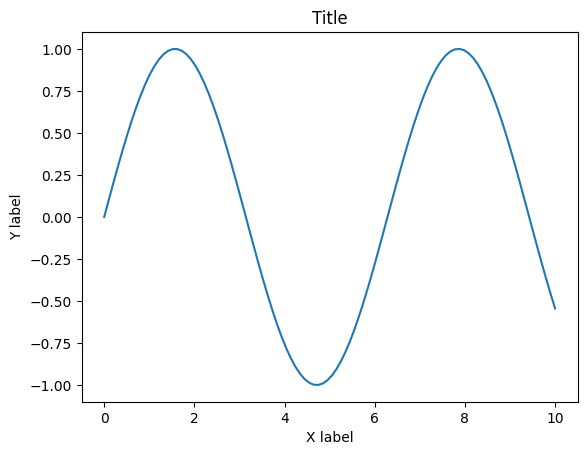

/usr/local/lib/python3.9/dist-packages/matplotlib/collections.py:963: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


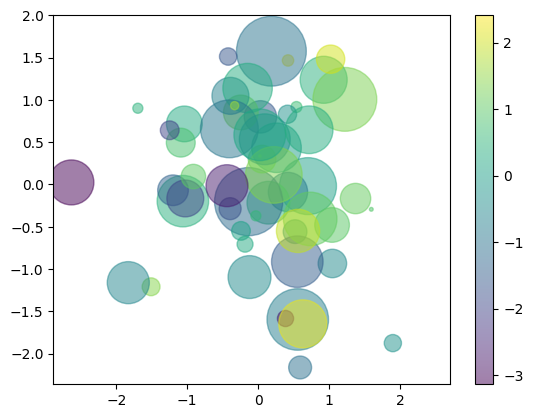

In [ ]:
!pip install matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Create a simple line chart
x = np.linspace(0, 10, 100)
y = np.sin(x)
plt.plot(x, y)
plt.xlabel('')
plt.ylabel('Y label')
plt.title('Title')
plt.show()

# Create a scatter plot
x = np.random.randn(100)
y = np.random.randn(100)
colors = np.random.randn(100)
sizes = 1000 * np.random.randn(100)
plt.scatter(x, y, c=colors, s=sizes, alpha=0.5)
plt.colorbar()
plt.show()

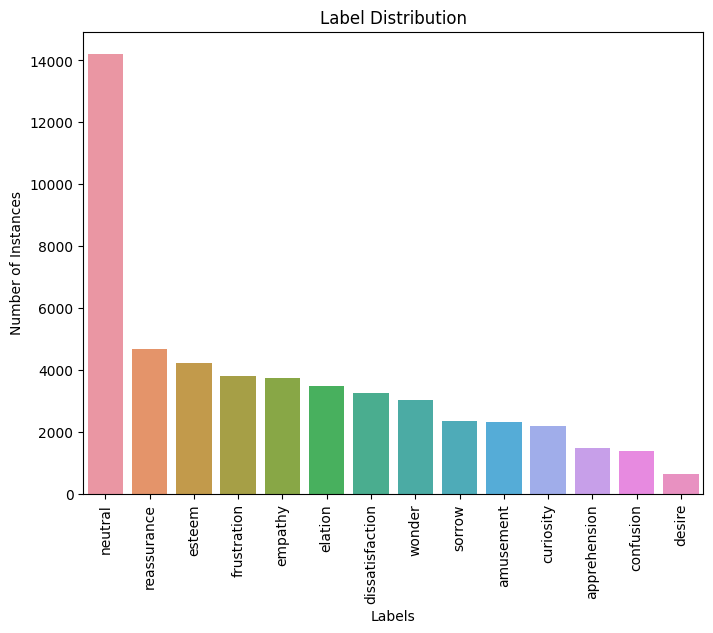

In [ ]:
plt.figure(figsize=(8, 6))
sns.barplot(x=df_train["labels"].value_counts().index, y=df_train["labels"].value_counts().values)
plt.title("Label Distribution")
plt.xlabel("Labels")
plt.ylabel("Number of Instances")
plt.xticks(rotation=90)
plt.show()

# DATA PRE-PROCESSING TECHNIQUES

1. Stemming
2. Lemmatization
3. Removal of stop words

## Using Naive Bayes as the Base model

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

def train_naive_bayes(x_train, y_train, x_test, y_test):

  classifier = MultinomialNB()
  classifier.fit(x_train, y_train)
  y_pred = classifier.predict(x_test)
  accuracy = accuracy_score(y_test, y_pred)
  print(f"Accuracy: {accuracy:.4f}")

  conf_matrix = confusion_matrix(y_test, y_pred)
  print(f"Confusion Matrix:\n{conf_matrix}")

  class_report = classification_report(y_test, y_pred)
  print(f"Classification Report:\n{class_report}")
  return y_pred

In [ ]:
import nltk
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer

def remove_stopwords(text):
    stop_words = set(stopwords.words("english"))
    tokens = word_tokenize(text)
    return " ".join([token for token in tokens if token not in stop_words])

def stem(text):
    stemmer = PorterStemmer()
    tokens = word_tokenize(text)
    return " ".join([stemmer.stem(token) for token in tokens])

def lemmatize(text):
    lemmatizer = WordNetLemmatizer()
    tokens = word_tokenize(text)
    return " ".join([lemmatizer.lemmatize(token) for token in tokens])

In [ ]:
preprocessing_options = {
    "Stopword Removal": remove_stopwords,
    "Stemming": stem,
    "Lemmatization": lemmatize
}

X_train = df_train['text']
y_train = df_train['labels']
X_test = df_test["text"]
y_test = df_test['labels']

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

results = []


for preprocessing_name, preprocessing_func in preprocessing_options.items():
        # Apply the preprocessing function
        X_train_preprocessed = X_train.apply(preprocessing_func)
        X_test_preprocessed = X_test.apply(preprocessing_func)

        # Vectorize the text
        vectorizer = TfidfVectorizer(ngram_range=(1,2))
        X_train_vectors = vectorizer.fit_transform(X_train_preprocessed)
        X_test_vectors = vectorizer.transform(X_test_preprocessed)

        # Train and evaluate the classifier
        #clf = LogisticRegression(max_iter=1000)
        #clf.fit(X_train_vectors, )
        y_pred = train_naive_bayes(X_train_vectors, y_train_encoded, X_test_vectors, y_test_encoded)

        f1 = f1_score(y_test_encoded, y_pred, average="weighted")
        acc = accuracy_score(y_test_encoded, y_pred)
        cm = confusion_matrix(y_test_encoded, y_pred)

        # Save the results in the results list
        results.append({
            "Preprocessing": preprocessing_name,
            "F1-score": f1,
            "Accuracy": acc,
            "Confusion Matrix": cm
        })

Accuracy: 0.4037
Confusion Matrix:
[[  29    0    0    0    0    0    1    0    1    0  229    4    0    0]
 [   0    6    0    0    0    0    0    0    0    0  201    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0  153    0    0    0]
 [   0    0    0   14    0    0    0    0    0    0  270    0    0    0]
 [   0    0    0    0    0    0    1    0    0    0   82    0    0    0]
 [   0    1    0    0    0   38    0    0    1    1  374    1    0    0]
 [   0    0    0    0    0    0   91    0    6    0  289    6    0    0]
 [   0    0    0    0    0    0    3  163    6    0  303    8    0    0]
 [   0    0    0    0    0    0    3    3  139    0  367    2    0    0]
 [   0    0    0    0    0    0    0    1    0   63  428    0    0    0]
 [   0    0    0    0    0    0    1    0    1    1 1784    0    0    0]
 [   0    0    0    0    0    0    2    0    1    0  428  117    0    0]
 [   0    0    0    0    0    0    0    0    0    0  255    1   16    0]
 [   0    0    0

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.3631
Confusion Matrix:
[[  10    0    0    0    0    0    0    0    1    0  252    1    0    0]
 [   0    2    0    0    0    0    0    0    0    0  205    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0  153    0    0    0]
 [   0    0    0    8    0    0    0    0    0    0  276    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0   83    0    0    0]
 [   0    0    0    0    0   11    0    1    0    1  403    0    0    0]
 [   0    0    0    0    0    0   75    0    3    0  313    1    0    0]
 [   0    0    0    0    0    0    1  145    4    0  329    4    0    0]
 [   0    0    0    0    0    0    2    3   98    0  409    2    0    0]
 [   0    0    0    0    0    0    0    1    0   27  464    0    0    0]
 [   0    0    0    0    0    0    1    0    1    0 1784    1    0    0]
 [   0    0    0    0    0    0    0    0    0    0  463   85    0    0]
 [   0    0    0    0    0    0    0    1    0    0  263    0    8    0]
 [   0    0    0

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.3676
Confusion Matrix:
[[   9    0    0    0    0    0    1    0    1    0  252    1    0    0]
 [   0    4    0    0    0    0    0    0    0    0  203    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0  153    0    0    0]
 [   0    0    0    9    0    0    0    0    0    0  275    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0   83    0    0    0]
 [   0    0    0    0    0   12    0    1    0    1  402    0    0    0]
 [   0    0    0    0    0    0   75    0    3    0  313    1    0    0]
 [   0    0    0    0    0    0    1  155    4    0  317    6    0    0]
 [   0    0    0    0    0    0    2    2  106    0  402    2    0    0]
 [   0    0    0    0    0    0    0    1    0   28  463    0    0    0]
 [   0    0    0    0    0    0    0    0    1    0 1786    0    0    0]
 [   0    0    0    0    0    0    0    0    1    0  458   89    0    0]
 [   0    0    0    0    0    0    0    1    0    0  264    0    7    0]
 [   0    0    0

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


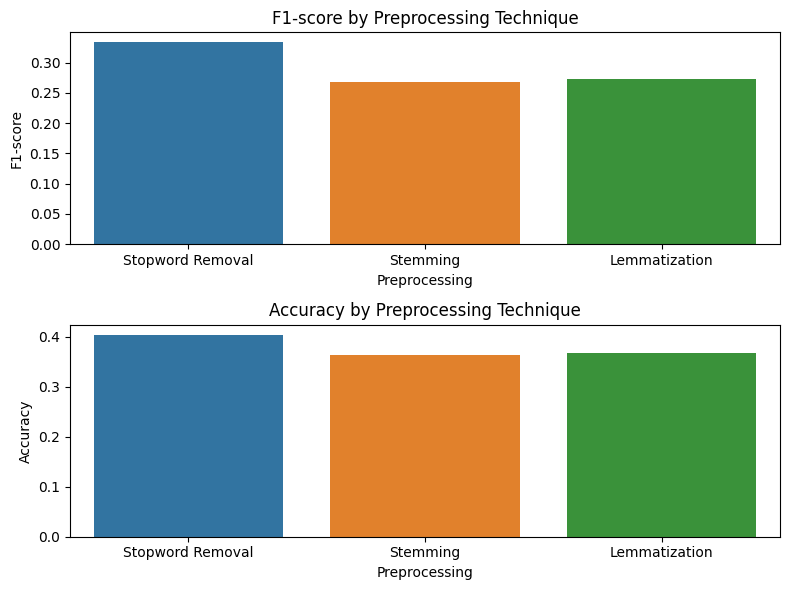

In [ ]:
results_df = pd.DataFrame(results)

fig, axes = plt.subplots(nrows=2, figsize=(8, 6))
sns.barplot(x="Preprocessing", y="F1-score", data=results_df, ax=axes[0])
sns.barplot(x="Preprocessing", y="Accuracy", data=results_df, ax=axes[1])

# Set titles and labels
axes[0].set_title("F1-score by Preprocessing Technique")
axes[1].set_title("Accuracy by Preprocessing Technique")
axes[0].set_ylabel("F1-score")
axes[1].set_ylabel("Accuracy")

plt.tight_layout()
plt.show()

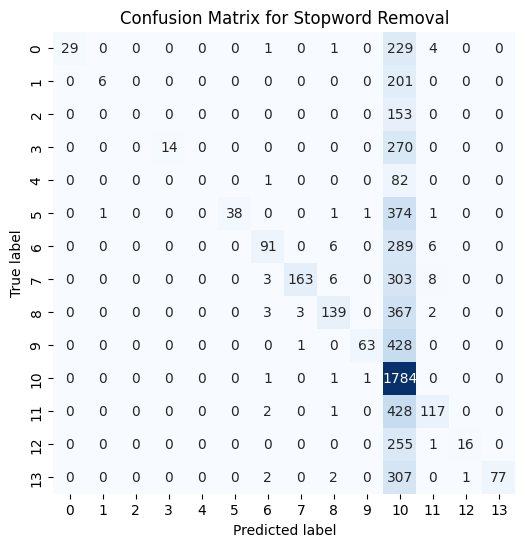

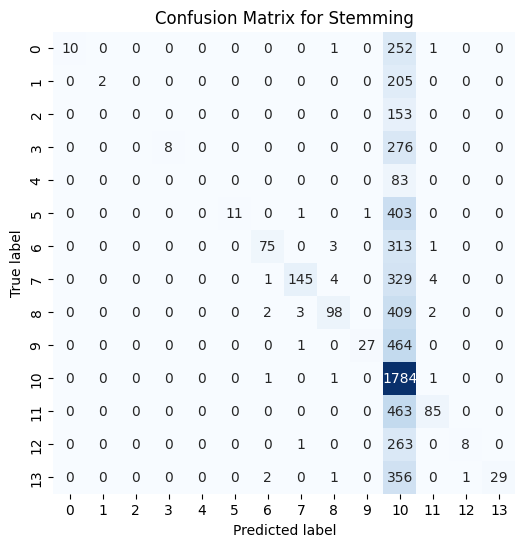

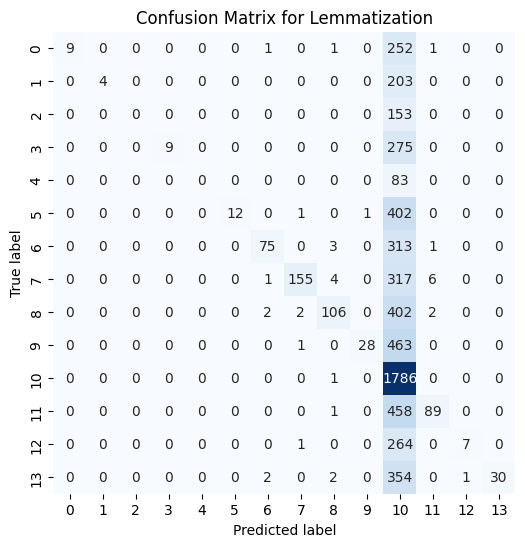

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Function to plot confusion matrix
def plot_confusion_matrix(confusion_matrix, preprocessing_method):
    plt.figure(figsize=(6, 6))
    sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, square=True)
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.title(f'Confusion Matrix for {preprocessing_method}')
    plt.show()

# Plot confusion matrix for each preprocessing method
for index, row in results_df.iterrows():
    plot_confusion_matrix(row['Confusion Matrix'], row['Preprocessing'])

# FEATURIZATION TECHNIQUES

1. TF-IDF
2. BOW
3. Word2Vec



In [ ]:
pip install gensim


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from gensim.models import Word2Vec
from sklearn.preprocessing import MinMaxScaler

def word2vec_featurization(train_data, val_data):
   
    # Train Word2Vec model on the tokenized text
    documents = [doc for doc in train_data]
    w2v_model = Word2Vec(documents, vector_size=100, window=5, min_count=1, workers=4, epochs=10)

    # Create feature vectors using the trained Word2Vec model
    w2v_vectors_train = np.array([np.mean([w2v_model.wv[word] for word in doc if word in w2v_model.wv], axis=0) for doc in train_data])
    w2v_vectors_val = np.array([np.mean([w2v_model.wv[word] for word in doc if word in w2v_model.wv], axis=0) for doc in val_data])

    # Scale feature vectors to be between 0 and 1
    scaler = MinMaxScaler()
    w2v_vectors_train_scaled = scaler.fit_transform(w2v_vectors_train)
    w2v_vectors_val_scaled = scaler.transform(w2v_vectors_val)

    return w2v_vectors_train_scaled, w2v_vectors_val_scaled


def tfidf_vectorizer(train_data, val_data):
    tfidf = TfidfVectorizer(ngram_range=(1, 2))
    train_data_vec = tfidf.fit_transform(train_data)
    val_data_vec = tfidf.transform(val_data)
    return train_data_vec, val_data_vec

def bow_vectorizer(train_data, val_data):
    count_vect = CountVectorizer(ngram_range=(1, 2))
    train_data_vec = count_vect.fit_transform(train_data)
    val_data_vec = count_vect.transform(val_data)
    return train_data_vec, val_data_vec

In [ ]:
featurization_options = {
    'Word2Vec': word2vec_featurization,
    'TF-IDF': tfidf_vectorizer,
    'BoW': bow_vectorizer,
}

def basic_preprocess(text):
    # Lowercase the text
    text_lower = text.lower()
    
    # Tokenize the lowercased text
    tokens = word_tokenize(text_lower)
    
    return ' '.join(tokens)


X_train = df_train['text']
y_train = df_train['labels']
X_val = df_test["text"]
y_val = df_test['labels']

X_train = X_train.apply(basic_preprocess)
X_val = X_val.apply(basic_preprocess)

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)

featurization_results = []

for featurization_name, featurization_func in featurization_options.items():

        print("Using Featurization Name: {}".format(featurization_name))


        # Apply Featurization

        X_train_vectors, X_val_vectors = featurization_func(X_train, X_val)

        y_pred = train_naive_bayes(X_train_vectors, y_train_encoded, X_val_vectors, y_val_encoded)

        acc = accuracy_score(y_val_encoded, y_pred)
        f1 = f1_score(y_val_encoded, y_pred, average='weighted')
        cm = confusion_matrix(y_val_encoded, y_pred)

        # Save the results in the results list
        featurization_results.append({
            "Featurization": featurization_name,
            "F1-score": f1,
            "Accuracy": acc,
            "Confusion Matrix": cm
        })

Using Featurization Name: Word2Vec
Accuracy: 0.2844
Confusion Matrix:
[[   0    0    0    0    0    0    0    0    0    0  264    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0  207    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0  153    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0  284    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0   83    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0  416    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0  392    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0  483    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0  514    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0  492    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0 1787    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0  548    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0  2

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.3697
Confusion Matrix:
[[  11    0    0    0    0    0    1    0    1    0  247    4    0    0]
 [   0    7    0    0    0    0    0    0    0    0  200    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0  153    0    0    0]
 [   0    0    0   10    0    0    0    0    0    0  274    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0   83    0    0    0]
 [   0    0    0    0    0    8    0    1    0    1  406    0    0    0]
 [   0    0    0    0    0    0   77    0    3    0  311    1    0    0]
 [   0    0    0    0    0    0    1  160    3    0  314    5    0    0]
 [   0    0    0    0    0    0    2    2  104    0  404    2    0    0]
 [   0    0    0    0    0    0    0    1    0   27  464    0    0    0]
 [   0    0    0    0    0    0    0    0    1    0 1786    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0  454   94    0    0]
 [   0    0    0    0    0    0    0    3    0    0  264    0    5    0]
 [   0    0    0

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.5159
Confusion Matrix:
[[  54    0    0    0    0    1    1    0    2    0  188   16    2    0]
 [   0   29    0    0    0    1    1    1    1    4  162    6    1    1]
 [   0    0   16    0    0    1    0    1    0    0  135    0    0    0]
 [   0    0    0   53    0    0    0    1    2    1  226    1    0    0]
 [   0    0    0    0    2    0    2    1    1    0   74    3    0    0]
 [   0    1    0    0    0   86    0    1    1    4  314    6    2    1]
 [   1    0    0    0    0    0  188    9    6    0  177   11    0    0]
 [   0    0    0    0    0    0    3  293    7    0  163   17    0    0]
 [   0    0    0    0    0    1    8    8  229    1  256   10    0    1]
 [   0    0    0    0    0    0    2    2    2  131  352    3    0    0]
 [   1    0    1    1    0    0    4   11    6   11 1744    8    0    0]
 [   0    0    0    0    0    0    2    3    5    0  301  236    0    1]
 [   0    0    0    0    0    1    0   11    1    0  198    6   55    0]
 [   0    0    0

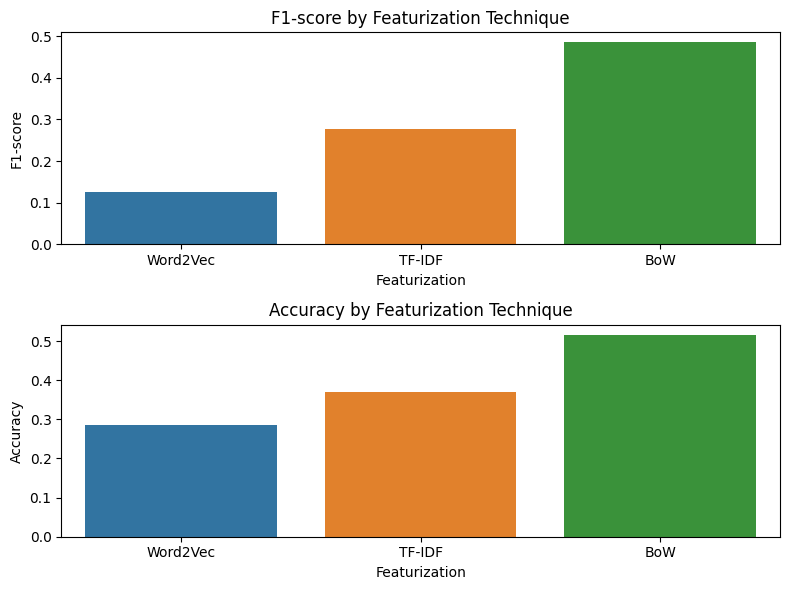

In [ ]:
featurization_results_df = pd.DataFrame(featurization_results)

fig, axes = plt.subplots(nrows=2, figsize=(8, 6))
sns.barplot(x="Featurization", y="F1-score", data=featurization_results_df, ax=axes[0])
sns.barplot(x="Featurization", y="Accuracy", data=featurization_results_df, ax=axes[1])

# Set titles and labels
axes[0].set_title("F1-score by Featurization Technique")
axes[1].set_title("Accuracy by Featurization Technique")
axes[0].set_ylabel("F1-score")
axes[1].set_ylabel("Accuracy")

plt.tight_layout()
plt.show()

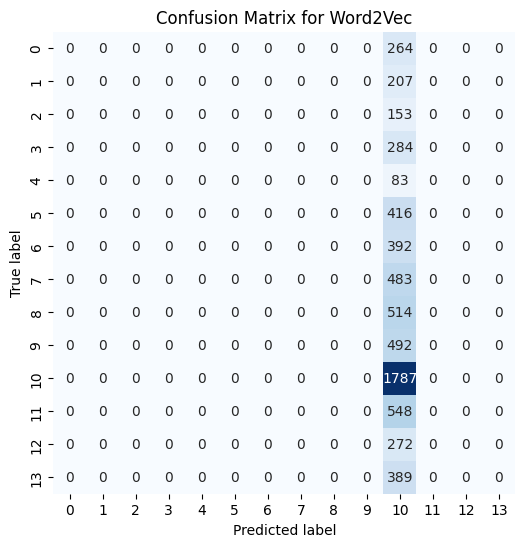

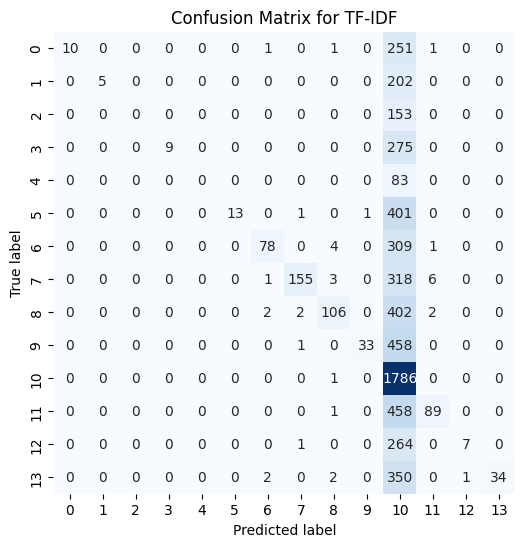

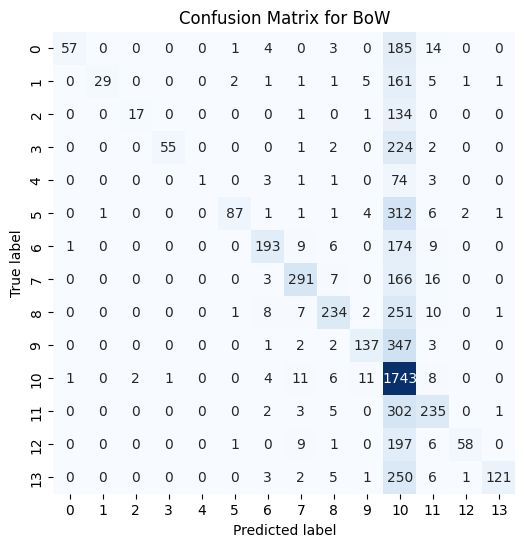

In [ ]:
# Plot confusion matrix for each featurization method
for index, row in featurization_results_df.iterrows():
    plot_confusion_matrix(row['Confusion Matrix'], row['Featurization'])

# NLP ALGORITHMS

1. Naive Bayes
2. Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix

def train_logistic_regression(x_train, y_train, x_test, y_test):
    model = LogisticRegression(max_iter=1000)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    return y_pred
    
def train_svm(x_train, y_train, x_test, y_test):
    model = SVC()
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    return y_pred


In [ ]:
nlp_algorithms = {
    'Naive Bayes': train_naive_bayes,
    #'SVM': train_svm,
    'Logistic Regression': train_logistic_regression
}

def basic_preprocess(text):
    # Lowercase the text
    text_lower = text.lower()
    
    # Tokenize the lowercased text
    tokens = word_tokenize(text_lower)
    
    return ' '.join(tokens)


X_train = df_train['text']
y_train = df_train['labels']
X_val = df_test["text"]
y_val = df_test['labels']

X_train = X_train.apply(basic_preprocess)
X_val = X_val.apply(basic_preprocess)

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)

nlp_algorithm_results = []

X_train_vectors, X_val_vectors = bow_vectorizer(X_train, X_val)

for nlp_algorithm_name, nlp_algorithm_func in nlp_algorithms.items():

        print("Using NLP Algorithm: {}".format(nlp_algorithm_name))

        y_pred = nlp_algorithm_func(X_train_vectors, y_train_encoded, X_val_vectors, y_val_encoded)

        acc = accuracy_score(y_val_encoded, y_pred)
        f1 = f1_score(y_val_encoded, y_pred, average='weighted')
        cm = confusion_matrix(y_val_encoded, y_pred)

        # Save the results in the results list
        nlp_algorithm_results.append({
            "NLP Algorithm": nlp_algorithm_name,
            "F1-score": f1,
            "Accuracy": acc,
            "Confusion Matrix": cm
        })

Using NLP Algorithm: Naive Bayes
Accuracy: 0.5159
Confusion Matrix:
[[  54    0    0    0    0    1    1    0    2    0  188   16    2    0]
 [   0   29    0    0    0    1    1    1    1    4  162    6    1    1]
 [   0    0   16    0    0    1    0    1    0    0  135    0    0    0]
 [   0    0    0   53    0    0    0    1    2    1  226    1    0    0]
 [   0    0    0    0    2    0    2    1    1    0   74    3    0    0]
 [   0    1    0    0    0   86    0    1    1    4  314    6    2    1]
 [   1    0    0    0    0    0  188    9    6    0  177   11    0    0]
 [   0    0    0    0    0    0    3  293    7    0  163   17    0    0]
 [   0    0    0    0    0    1    8    8  229    1  256   10    0    1]
 [   0    0    0    0    0    0    2    2    2  131  352    3    0    0]
 [   1    0    1    1    0    0    4   11    6   11 1744    8    0    0]
 [   0    0    0    0    0    0    2    3    5    0  301  236    0    1]
 [   0    0    0    0    0    1    0   11    1    0  198

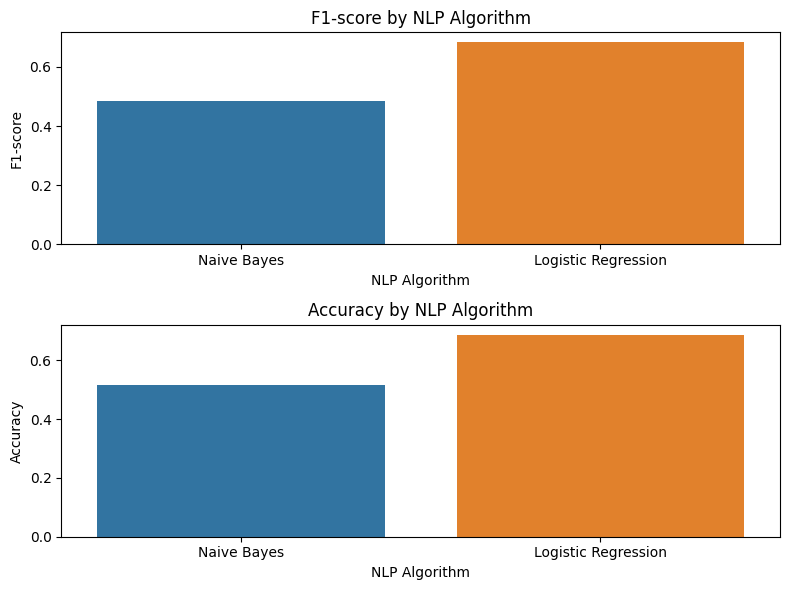

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

nlp_algorithm_results_df = pd.DataFrame( nlp_algorithm_results)

fig, axes = plt.subplots(nrows=2, figsize=(8, 6))
sns.barplot(x="NLP Algorithm", y="F1-score", data=nlp_algorithm_results_df, ax=axes[0])
sns.barplot(x="NLP Algorithm", y="Accuracy", data=nlp_algorithm_results_df, ax=axes[1])

# Set titles and labels
axes[0].set_title("F1-score by NLP Algorithm")
axes[1].set_title("Accuracy by NLP Algorithm")
axes[0].set_ylabel("F1-score")
axes[1].set_ylabel("Accuracy")

plt.tight_layout()

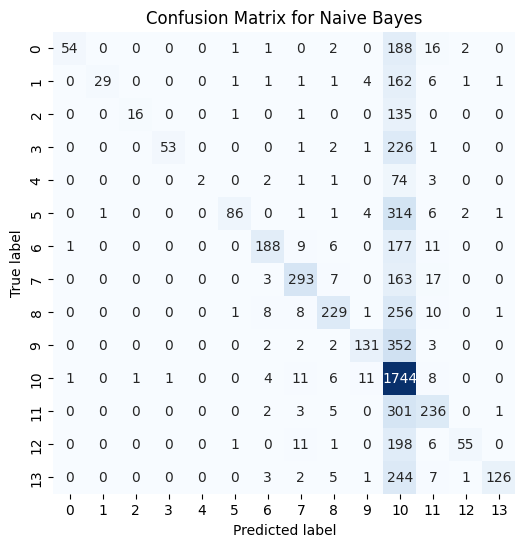

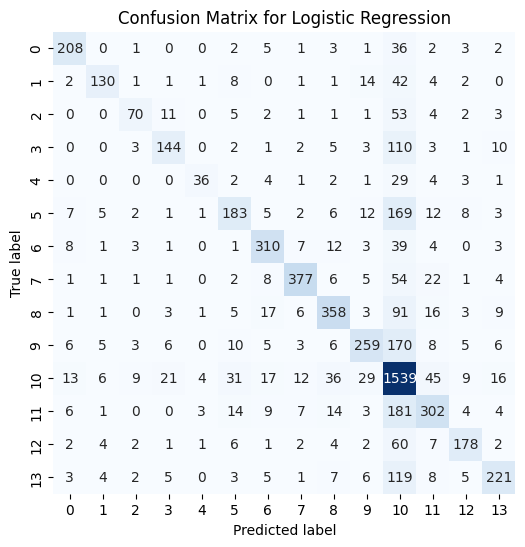

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Function to plot confusion matrix
def plot_confusion_matrix(confusion_matrix, preprocessing_method):
    plt.figure(figsize=(6, 6))
    sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, square=True)
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.title(f'Confusion Matrix for {preprocessing_method}')
    plt.show()

# Plot confusion matrix for each preprocessing method
for index, row in nlp_algorithm_results_df.iterrows():
    plot_confusion_matrix(row['Confusion Matrix'], row['NLP Algorithm'])

# TUNING TRAINING HYPERPARAMETERS

The Alpha hyperparameter is the smoothing parameter used in Naive Bayes. It can be tuned to find the optimal level of smoothing that balances overfitting and underfitting.

Alpha values to be used:

- 0.1
- 0.5
- 1.0
- 2.0
- 5.0
- 10.0

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV

alpha_hyperparameters =  [0.1, 0.5, 1.0, 2.0, 5.0, 10.0]
naive_bayes_hyperparameters_tuning_results = []

for alpha_num in alpha_hyperparameters:
    print("Using alpha value as {}".format(alpha_num))
    model = MultinomialNB(alpha=alpha_num)
    model.fit(X_train_vectors, y_train_encoded)
    y_pred = model.predict(X_val_vectors)
    acc = accuracy_score(y_val_encoded, y_pred)
    f1 = f1_score(y_val_encoded, y_pred, average='weighted')
    cm = confusion_matrix(y_val_encoded, y_pred)

    naive_bayes_hyperparameters_tuning_results.append({
        "Naive Bayes Alpha Hyperparameters Tuning": "alpha_{}".format(alpha_num),
            "F1-score": f1,
            "Accuracy": acc,
            "Confusion Matrix": cm
    })







Using alpha value as 0.1
Using alpha value as 0.5
Using alpha value as 1.0
Using alpha value as 2.0
Using alpha value as 5.0
Using alpha value as 10.0


In [ ]:
naive_bayes_hyperparameters_tuning_results

[{'Naive Bayes Alpha Hyperparameters Tuning': 'alpha_0.1',
  'F1-score': 0.5760464201890115,
  'Accuracy': 0.5805219605346913,
  'Confusion Matrix': array([[ 125,    2,    1,    2,    0,    5,   11,    6,    9,   13,   62,
            18,    3,    7],
         [   2,   79,    2,    2,    1,    9,    1,    1,    9,   24,   50,
            10,   10,    7],
         [   0,    2,   62,   10,    0,    6,    2,    2,    0,    2,   50,
             8,    1,    8],
         [   1,    0,    4,  140,    0,    4,    2,    9,    6,    8,   91,
             9,    1,    9],
         [   0,    0,    0,    1,   14,    2,    7,    2,    3,    4,   34,
            13,    2,    1],
         [   3,    2,    3,    6,    1,  177,    5,    4,    7,   23,  150,
            17,   10,    8],
         [   5,    3,    0,    2,    0,    3,  260,   18,   27,    5,   46,
            15,    2,    6],
         [   2,    0,    2,    2,    0,    1,   10,  360,   15,    6,   53,
            25,    4,    3],
         [   

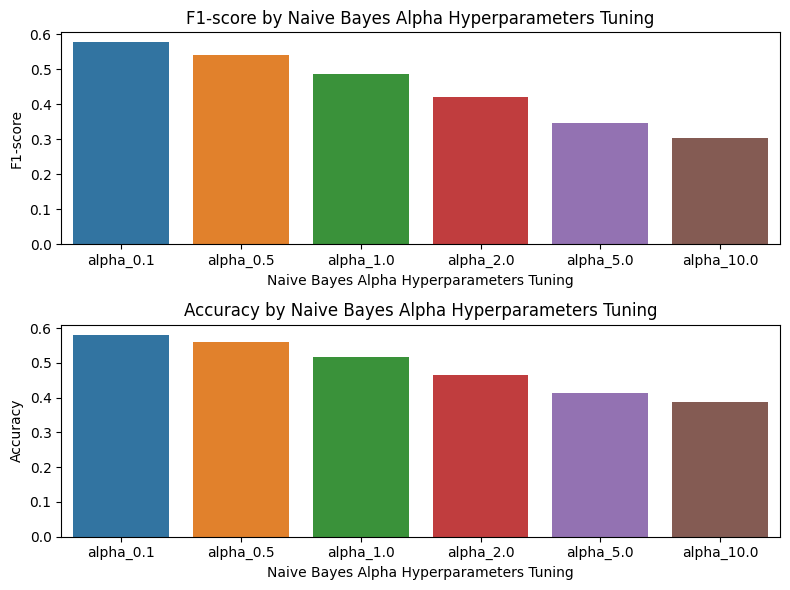

In [ ]:
naive_bayes_hyperparameters_tuning_results_df = pd.DataFrame( naive_bayes_hyperparameters_tuning_results)

fig, axes = plt.subplots(nrows=2, figsize=(8, 6))
sns.barplot(x="Naive Bayes Alpha Hyperparameters Tuning", y="F1-score", data=naive_bayes_hyperparameters_tuning_results_df , ax=axes[0])
sns.barplot(x="Naive Bayes Alpha Hyperparameters Tuning", y="Accuracy", data=naive_bayes_hyperparameters_tuning_results_df , ax=axes[1])

# Set titles and labels
axes[0].set_title("F1-score by Naive Bayes Alpha Hyperparameters Tuning")
axes[1].set_title("Accuracy by Naive Bayes Alpha Hyperparameters Tuning")
axes[0].set_ylabel("F1-score")
axes[1].set_ylabel("Accuracy")

plt.tight_layout()

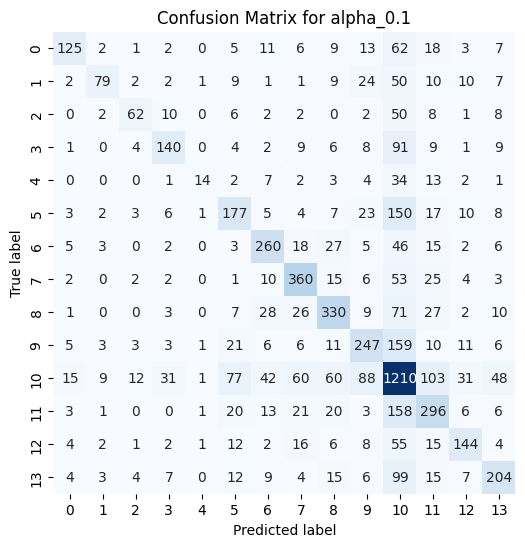

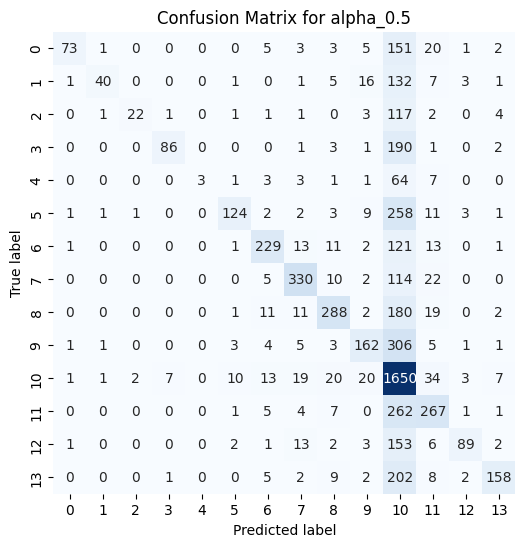

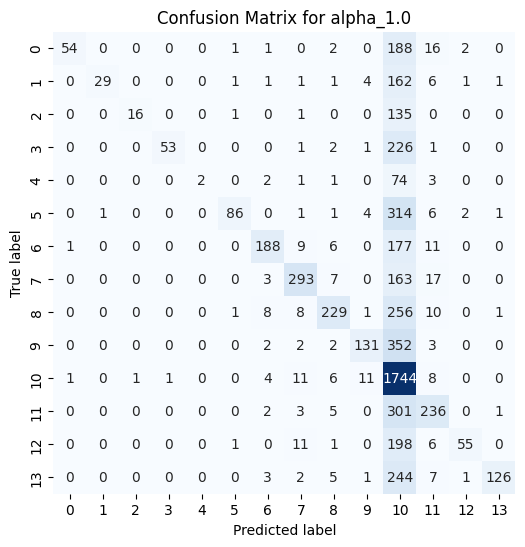

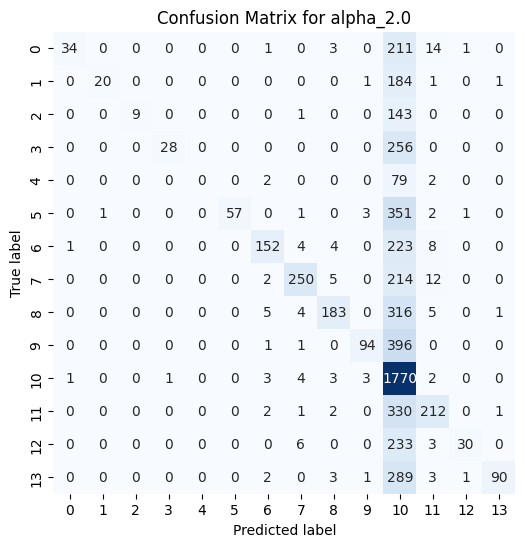

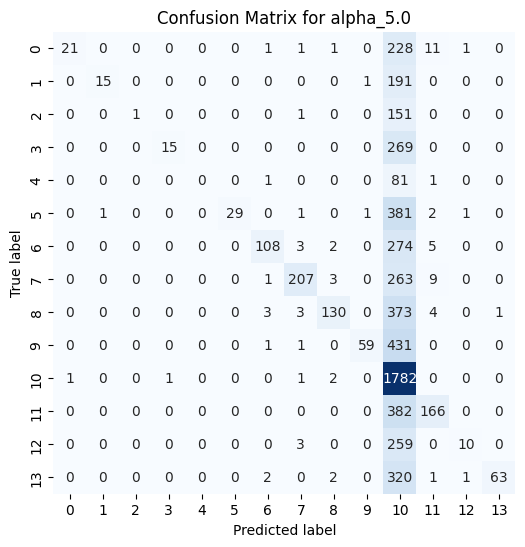

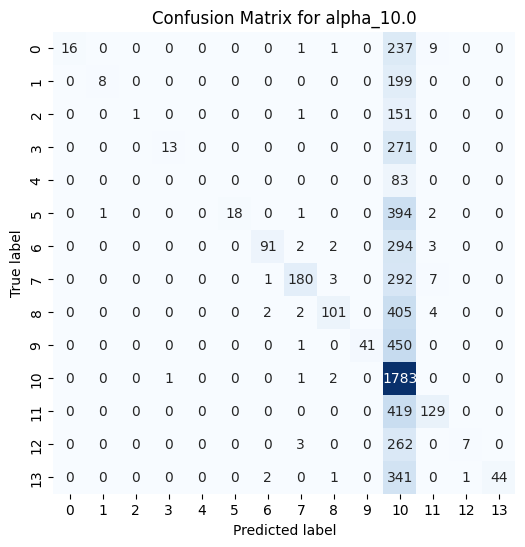

In [ ]:
for index, row in naive_bayes_hyperparameters_tuning_results_df.iterrows():
    plot_confusion_matrix(row['Confusion Matrix'], row['Naive Bayes Alpha Hyperparameters Tuning'])